In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si

In [2]:
data = yf.download("FTM-USD", start="2022-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,2.255523,2.582978,2.255523,2.582978,2.582978,852480114
2022-01-02,2.582069,2.594093,2.454201,2.484188,2.484188,707034819
2022-01-03,2.484853,2.859961,2.382528,2.859961,2.859961,1545569741
2022-01-04,2.859939,3.043612,2.816548,2.878697,2.878697,1675671890
2022-01-05,2.878817,3.152117,2.623543,2.956883,2.956883,2593979585


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,0.205122,0.206638,0.199587,0.202273,0.202273,40438136
2022-12-28,0.202296,0.203867,0.194515,0.198087,0.198087,61157513
2022-12-29,0.198072,0.202662,0.197973,0.201747,0.201747,50585887
2022-12-30,0.201751,0.202065,0.195475,0.198892,0.198892,48508540
2022-12-31,0.198898,0.201369,0.197007,0.199700,0.199700,27745637


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

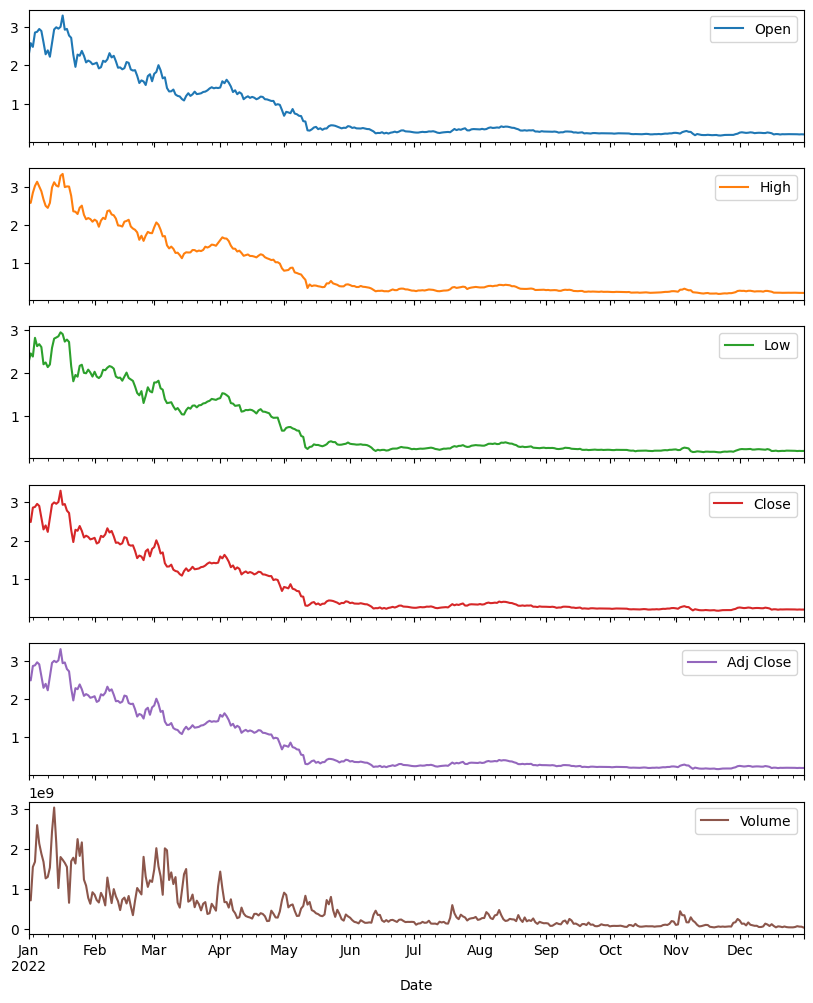

In [5]:
data.plot(figsize=(10, 12), subplots=True)

In [6]:
data = yf.download("FTM-USD", start="2020-10-01", end="2021-01-01")

[*********************100%***********************]  1 of 1 completed


In [7]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [8]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')


The annualised volatility is 141.4 %


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [10]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [11]:
S = 0.25
K = 0.35
T = 0.25   # 3 Months time period
r = 0.03
q = 0

In [12]:
euro_option_bs(S, K, T, r, vol, 'call')

0.0421563171653585

In [13]:
S = np.linspace(0.1,0.35,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 0.35, 0.25, 0.03, 1.56, 'call')

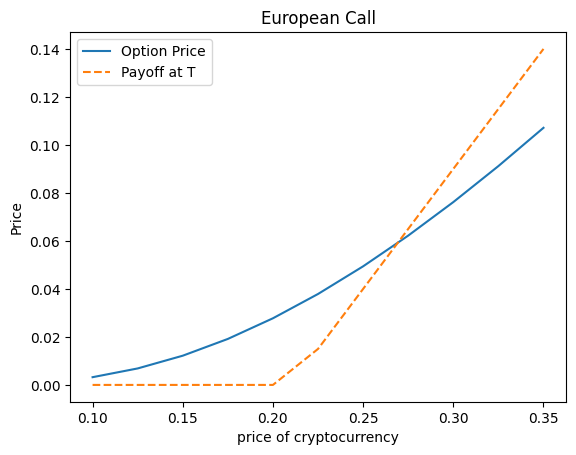

In [14]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-0.21,0), '--')
plt.xlabel('price of cryptocurrency')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])


In [15]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [16]:
T = 0.25
r = 0.03
vol = 1.56
S0 = 0.25
K = 0.35

In [17]:
S = mcs_simulation_np(1000)


In [18]:
S = np.transpose(S)
S

array([[0.25      , 0.23870225, 0.23626904, ..., 0.42938151, 0.43309245,
        0.44289014],
       [0.25      , 0.26181934, 0.25612734, ..., 0.38767345, 0.40037002,
        0.39273399],
       [0.25      , 0.2468936 , 0.24370476, ..., 0.22738099, 0.2183472 ,
        0.22225632],
       ...,
       [0.25      , 0.25077481, 0.24009906, ..., 0.25882939, 0.26055182,
        0.25917363],
       [0.25      , 0.23875223, 0.24313563, ..., 0.3658155 , 0.34988364,
        0.34835548],
       [0.25      , 0.24609474, 0.24843843, ..., 0.08684358, 0.08502022,
        0.0847142 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

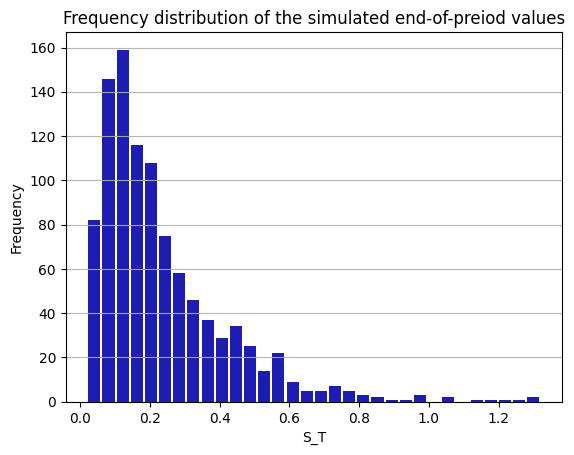

In [19]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.9, rwidth=0.85)

plt.grid(axis='y', alpha=0.9)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [20]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.03848174349521


In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [30]:
S = np.linspace(0.10, 0.50, 30)
T = np.linspace(0.10, 0.7, 30)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

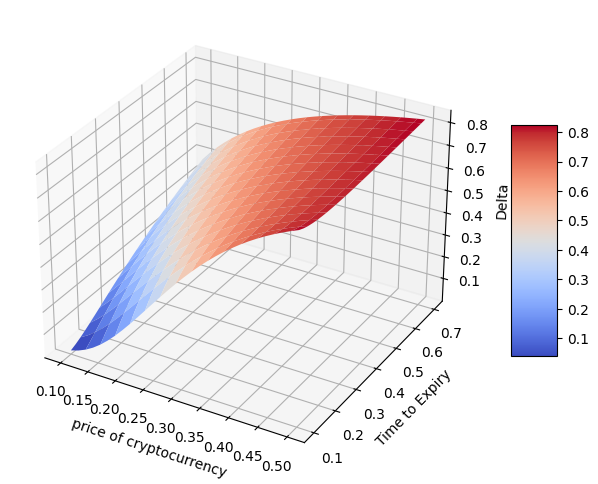

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [33]:
d = delta(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.4873 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.4873 .


In [34]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [35]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

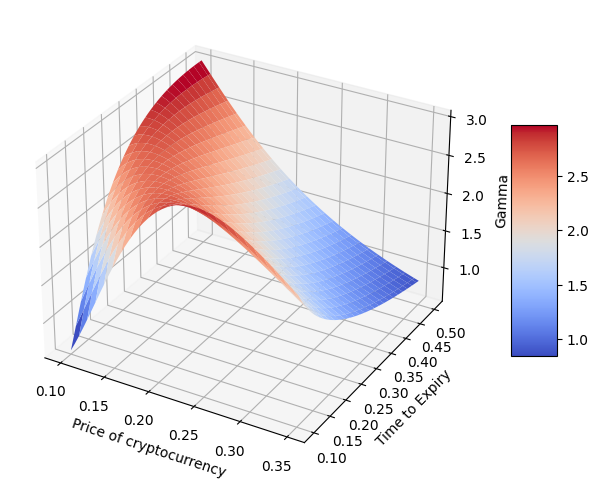

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [38]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [39]:
gamma(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

2.044826329325133

In [40]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [41]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

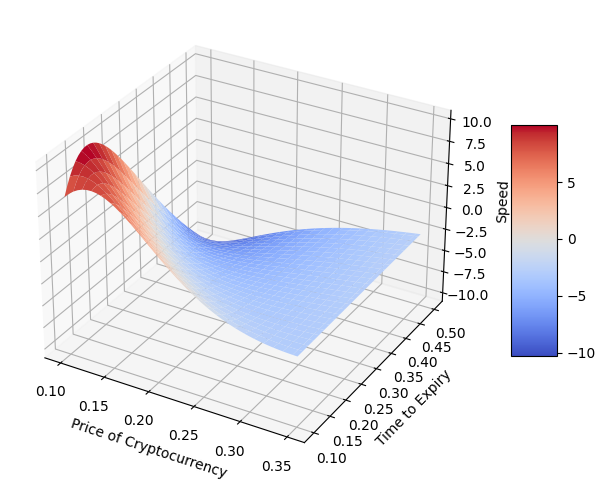

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [43]:
speed(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

-3.9231341784420857

In [44]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [45]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

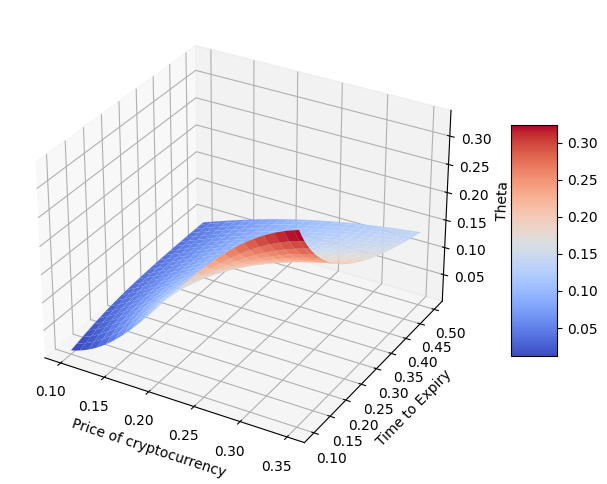

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [47]:
theta(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

0.1576815684520732

In [48]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [49]:
S = np.linspace(0.1, 0.35, 50)
T = np.linspace(0.1, 0.50, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

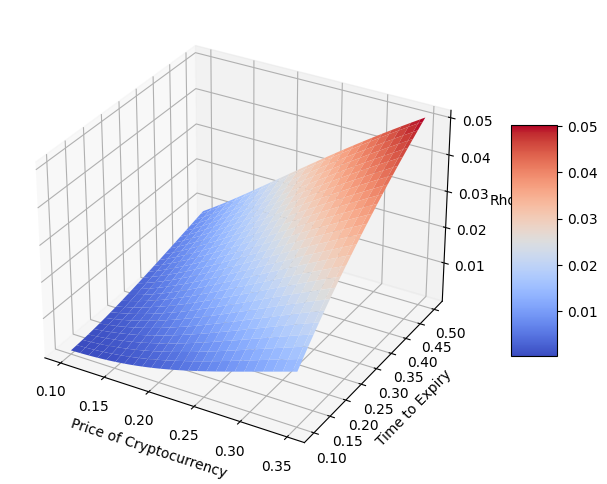

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [51]:
rho(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

0.018104384224140162

In [52]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [53]:
S = np.linspace(0.25, 0.35, 50)
T = np.linspace(0.1, 0.50, 50)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

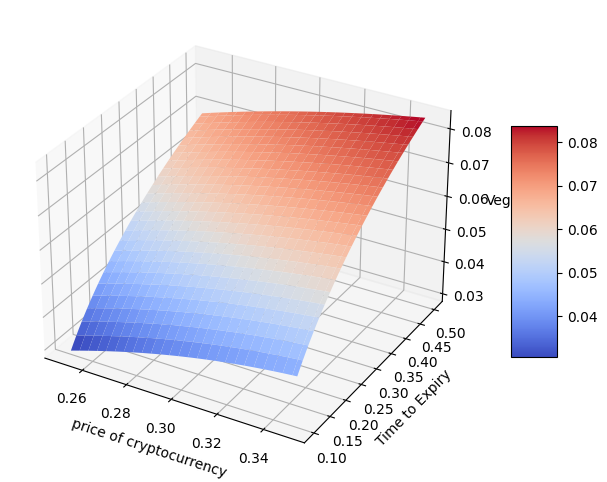

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [55]:
v = vega(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 0.0498 . If the volatility increases 1%, then the value of the option will increase $ 0.000498 .
